In [5]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from utils import get_feature_labels, get_binetflow_files, get_saved_data, \
        get_classifier


def plot_roc_curve(classifier, feature, label, name):
    feat_train, feat_test, label_train, label_test = train_test_split(
                    feature, label, test_size=0.5,
                    random_state=42)
    y_score = classifier.fit(feat_train, label_train).predict(feat_test)
    fpr, tpr, _ = roc_curve(label_test[:], y_score[:])
    roc_auc = auc(fpr, tpr)

    # Plotting
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw,
             label='ROC area under curve = {0:.4f}'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.legend(loc='lower right')
    plt.title('ROC for {}'.format(name))
    plt.show()

binet_files = get_binetflow_files()

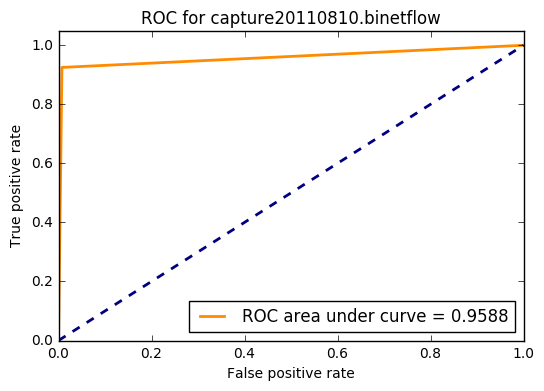

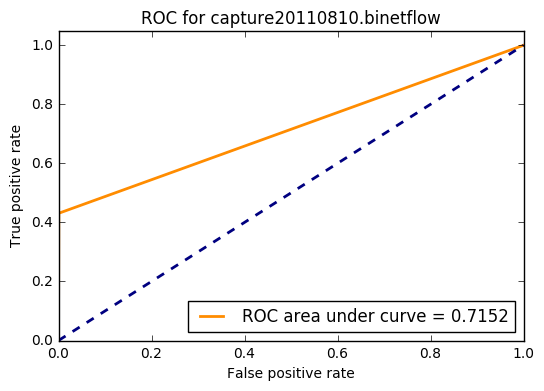

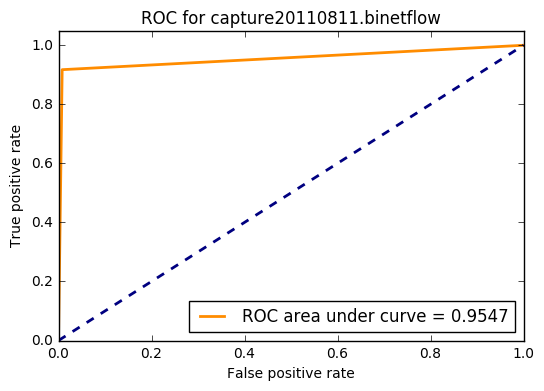

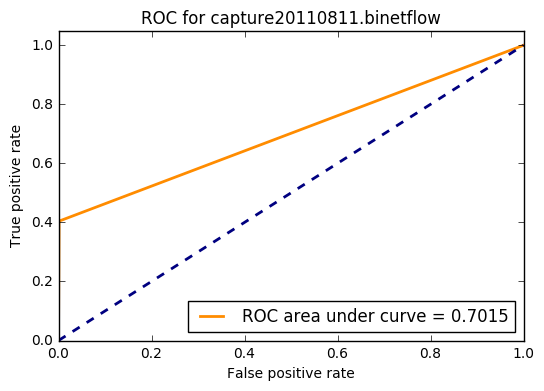

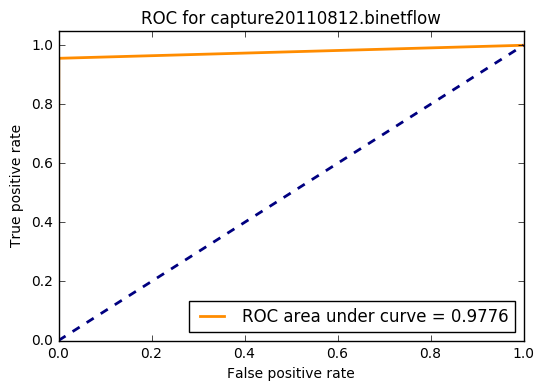

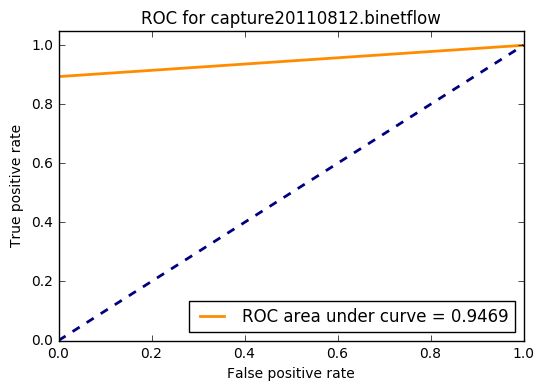

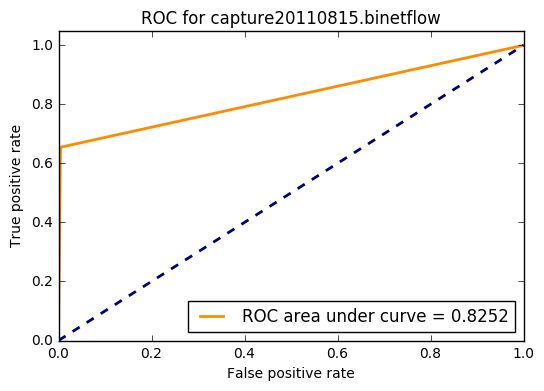

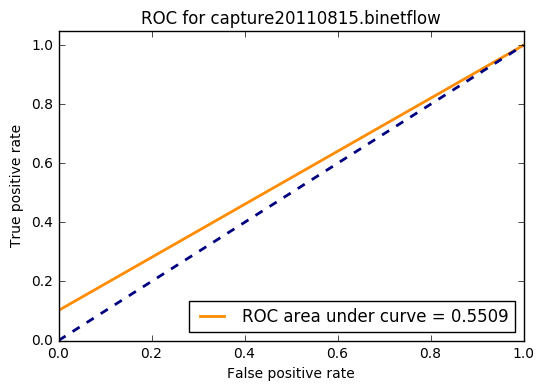

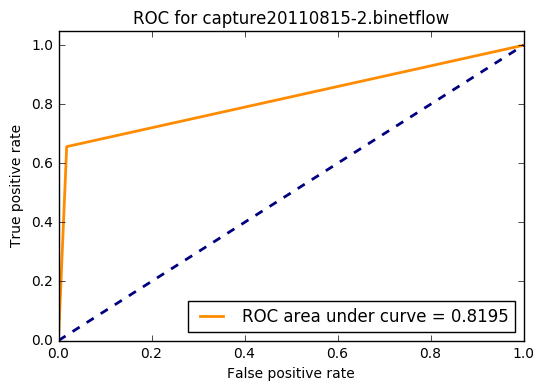

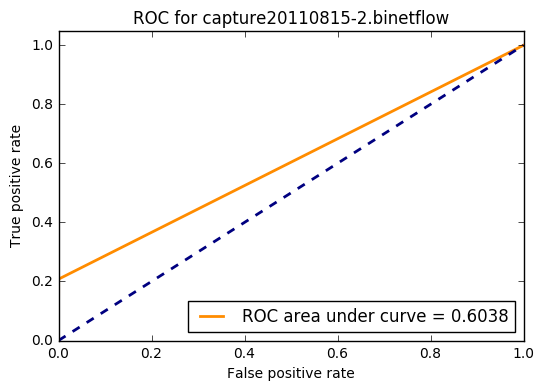

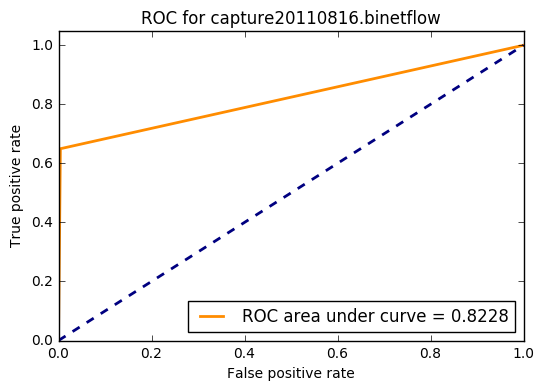

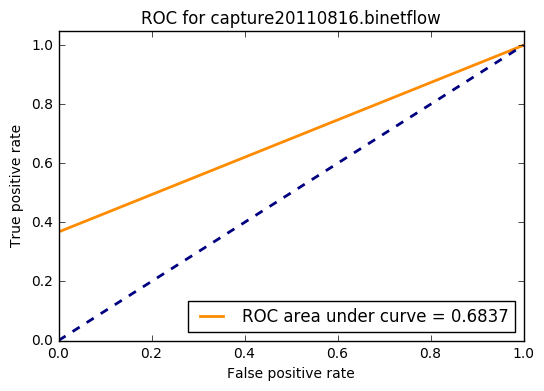

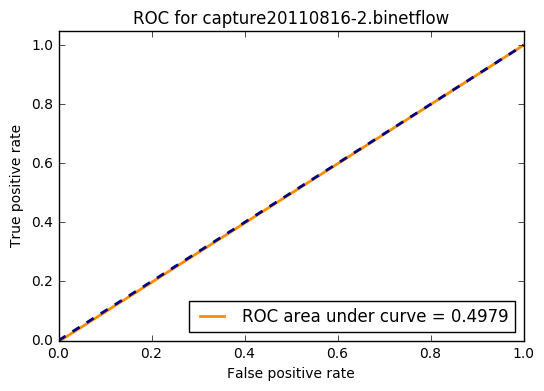

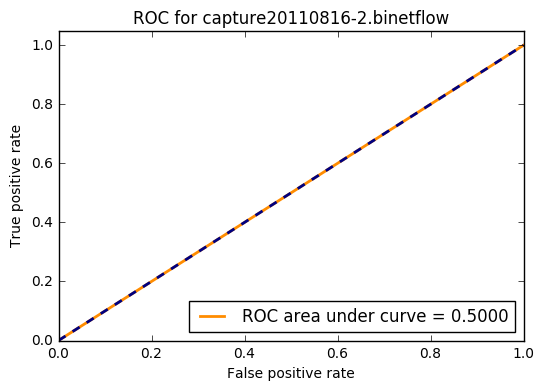

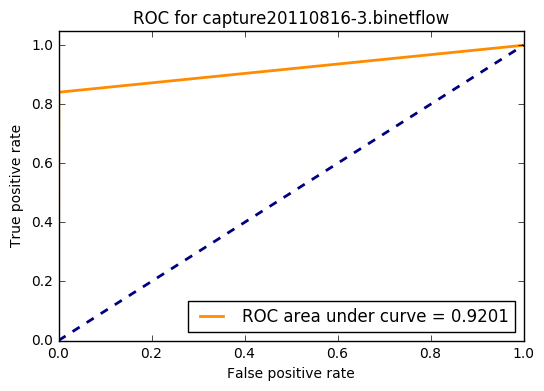

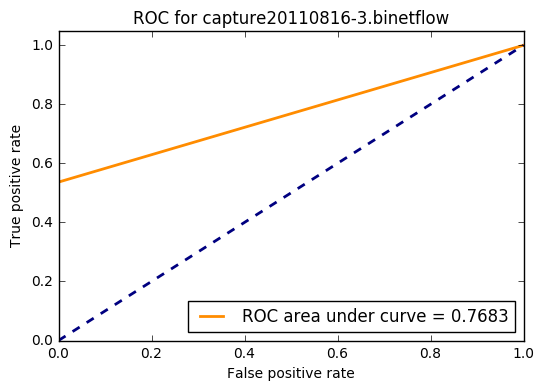

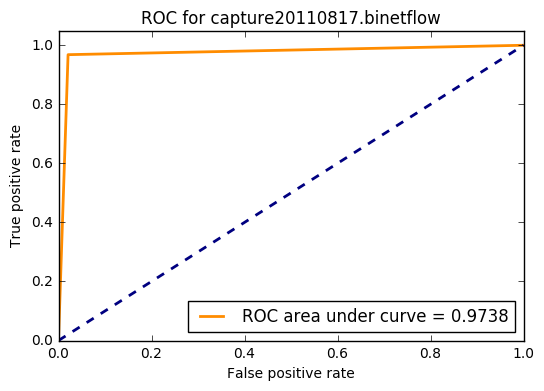

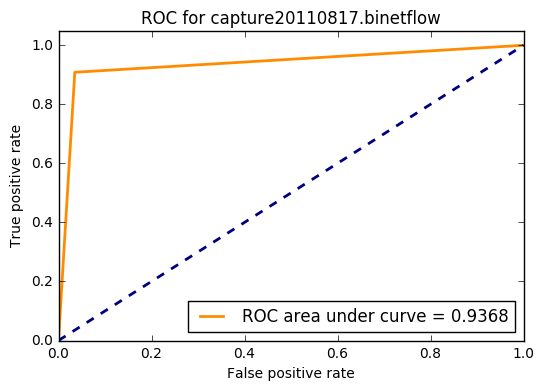

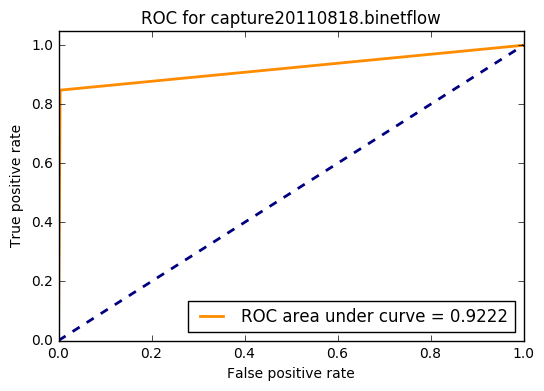

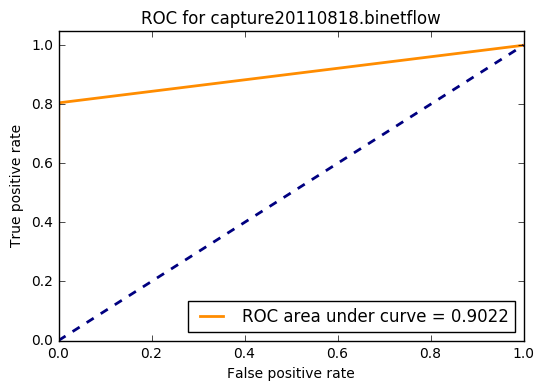

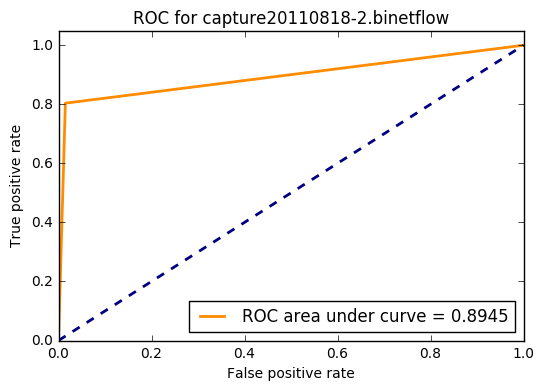

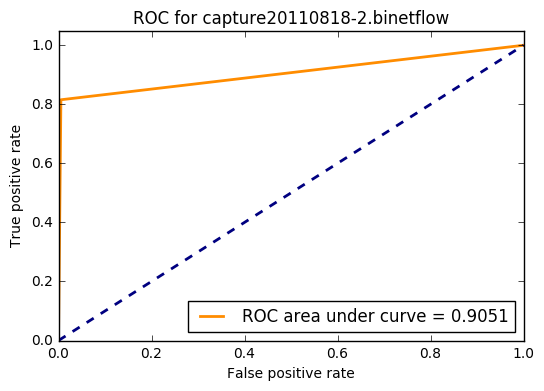

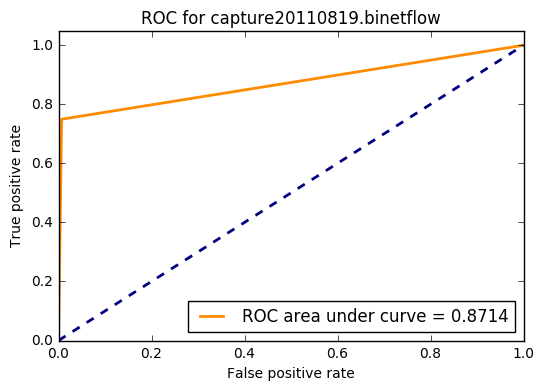

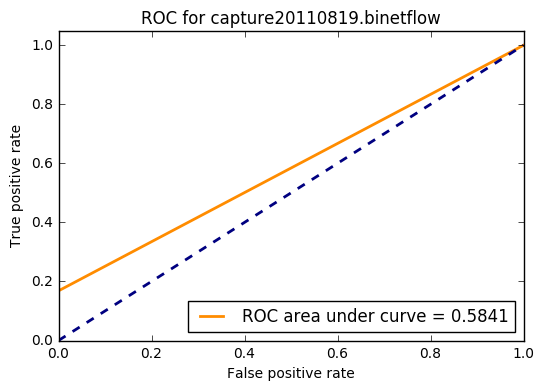

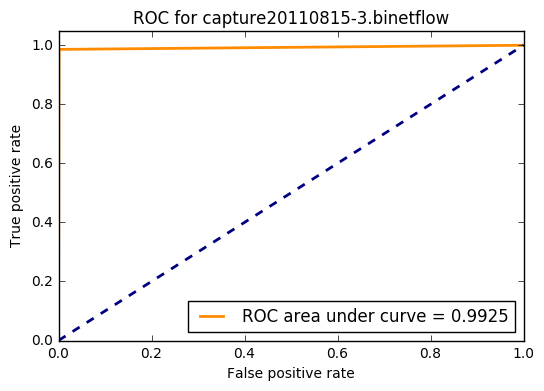

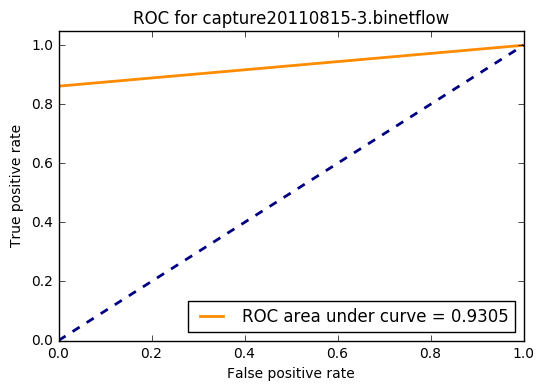

In [8]:
for binet in binet_files:
    feature, label = get_feature_labels(get_saved_data(0.15, binet))
    plot_roc_curve(get_classifier('dt'), feature, label, binet)
    plot_roc_curve(get_classifier('rf'), feature, label, binet)